In [360]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [361]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error

lets find out more about the dataset.

In [362]:
df = pd.read_csv("/kaggle/input/car-price-prediction/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

As you can see above we have no null entities so we can move forward with analysisng our data. Lets start with how the price is distributed.

In [364]:
fig = px.histogram(df,x="price")
fig.show()

In [365]:
corr_matrix =df.corr()
corr_matrix["price"].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

Lets try to visualize some of these correlations to make a better understanding.

(0.0, 53419.46381505026)

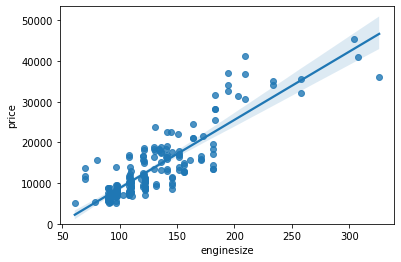

In [366]:
sns.regplot(x="enginesize", y="price", data=df)
plt.ylim(0,)

(0.0, 47755.94909036803)

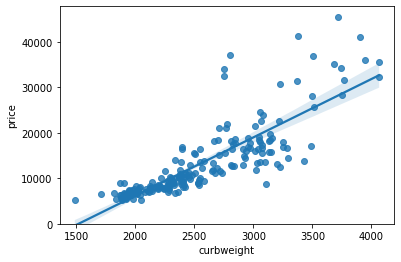

In [367]:
sns.regplot(x="curbweight", y="price", data=df)
plt.ylim(0,)

(0.0, 51683.16962863145)

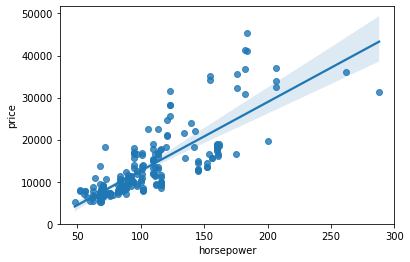

In [368]:
sns.regplot(x="horsepower", y="price", data=df)
plt.ylim(0,)

(0.0, 47910.555287943665)

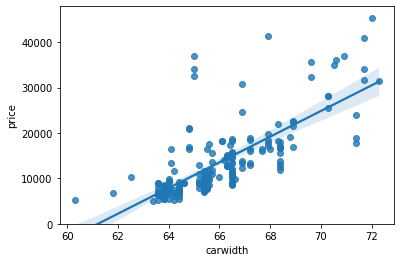

In [369]:
sns.regplot(x="carwidth", y="price", data=df)
plt.ylim(0,)

(0.0, 48144.18434968546)

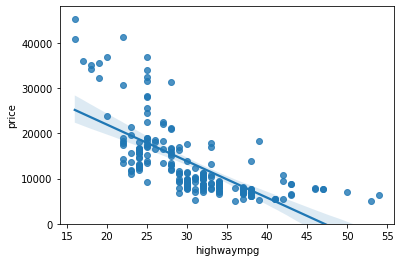

In [370]:
sns.regplot(x="highwaympg", y="price", data=df)
plt.ylim(0,)

(0.0, 48199.44579247121)

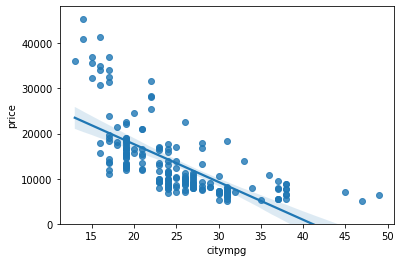

In [371]:
sns.regplot(x="citympg", y="price", data=df)
plt.ylim(0,)

Lets use "enginesize","curbweight","horsepower","citympg","highwaympg","carwidth" as independent variables since these variables showed stronger correlation to  variable "price".

In [372]:
X = df[["enginesize","curbweight","horsepower","citympg","highwaympg","carwidth"]] #independent variables 
y = df['price'] #dependent variable

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=42)


In [374]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [375]:
scaler.mean_

array([ 127.32116788, 2580.91970803,  105.8540146 ,   24.75182482,
         30.27007299,   66.00510949])

In [376]:
#creating a simple regression model
lm = LinearRegression()
lm
lm.fit(X_train,y_train)
y_pred_lm = lm.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lm)
print('Mean Squared Error:', mse)

Mean Squared Error: 15714290.162792418


In [377]:
lm.score(X_test, y_test)

0.7598496747255021

In [378]:

# Create a dataframe to compare the actual and predicted prices
compare = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# Print the first 10 rows of the comparison dataframe
print(compare.head(10))


     Actual Price  Predicted Price
15      30760.000     36220.292969
9       17859.167     19440.218750
100      9549.000      8924.473633
132     11850.000     12370.040039
68      28248.000     31845.087891
95       7799.000      6878.360840
159      7788.000      7892.883301
162      9258.000      7838.148438
147     10198.000     12180.645508
182      7775.000      7995.110840


Using XGBoost regressor to predict the price of the cars using the came indenpendent variables.

In [379]:
xgb_reg = xgb.XGBRegressor()

xgb_reg.fit(X_train, y_train)

y_pred_xrg = xgb_reg.predict(X_test)

# Print the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred_xrg)
print('Mean Squared Error:', mse)



Mean Squared Error: 5972923.308228865


In [380]:
xgb_reg.score(X_test, y_test)

0.9087200592294586

In [381]:
# Create a dataframe of the actual and predicted car prices
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xrg})

# Print the dataframe
print(df)

        Actual     Predicted
15   30760.000  31441.220703
9    17859.167  19014.527344
100   9549.000   8982.410156
132  11850.000  12359.811523
68   28248.000  31809.750000
..         ...           ...
75   16503.000  16678.593750
174  10698.000  10651.284180
31    6855.000   8333.804688
12   20970.000  19238.220703
35    7295.000   7206.081543

[68 rows x 2 columns]
